In [29]:
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv("..\\vacancies.csv")
df

,date,vacancy,salary,place,description,company,required_technologies
0,2024-01-04,Data & Machine Learning Engineer (Python),NaN,"Київ, за кордоном, віддалено",",We are,,Softwarium,— Ukrainian outsourcing IT...",Softwarium,"pytorch,mlflow,kubeflow,docker,salesforce crm,..."
1,2023-12-12,Junior Python Developer (full stack),NaN,Львів,",We are currently seeking a motivated and skil...",Synergy Way,"pytorch,docker,js,django,ml,oop,tensorflow,pyt..."
2,2023-12-11,Senior Python Developer,NaN,"за кордоном, віддалено",",Numerical Technologies is a leading provider ...",Numerical Technologies Ltd,"microservice,python,git,rest,aws,api,fastapi,ai"
3,2023-12-12,Senior Python Developer,NaN,віддалено,",Вітаю! Я Катерина, рекрутер Лінії магазинів E...",Лінія магазинів EVA,"postgresql,elasticsearch,django,python,redis,r..."
4,2023-12-11,Python Developer,NaN,віддалено,",Intetics Inc. is a leading American technolog...",Intetics,"ml,python,git,aws,ai"
...,...,...,...,...,...,...,...
115,2024-01-09,Automation QA Middle (Python) Engineer,NaN,"Вінниця, віддалено",",Perimeter 81,is expanding team for developmen...",Delphi Software,"mongodb,docker,coverage,python,aws,api,full st..."
116,2024-01-10,Python Engineer,NaN,"Київ, віддалено",",FAVBET,Tech develops software that is used by...",FAVBET Tech,"docker,js,python,git,rest,api,async,redis,js,a..."
117,2024-01-10,Software Engineer,NaN,віддалено,",We are looking for Engineer passionate about ...",INCOAlliance,"helm,docker,elasticsearch,microservice,spark,h..."
118,2024-01-10,Python Tech Lead/Architect; ID 89500,NaN,"Київ, Харків, Львів, Дніпро, Одеса, Вінниця, І...",",ПРО НАС:,SoftServe — це провідна ІТ-компанія,...",SoftServe,"python,aws,ai"


In [31]:
df["required_technologies"]

0      pytorch,mlflow,kubeflow,docker,salesforce crm,...
1      pytorch,docker,js,django,ml,oop,tensorflow,pyt...
2        microservice,python,git,rest,aws,api,fastapi,ai
3      postgresql,elasticsearch,django,python,redis,r...
4                                   ml,python,git,aws,ai
                             ...                        
115    mongodb,docker,coverage,python,aws,api,full st...
116    docker,js,python,git,rest,api,async,redis,js,a...
117    helm,docker,elasticsearch,microservice,spark,h...
118                                        python,aws,ai
119     docker,graphql,python,aws,api,fastapi,aiohttp,ai
Name: required_technologies, Length: 120, dtype: object

In [32]:
df["date"] = pd.to_datetime(df["date"])
df.dtypes

date                     datetime64[ns]
vacancy                          object
salary                           object
place                            object
description                      object
company                          object
required_technologies            object
dtype: object

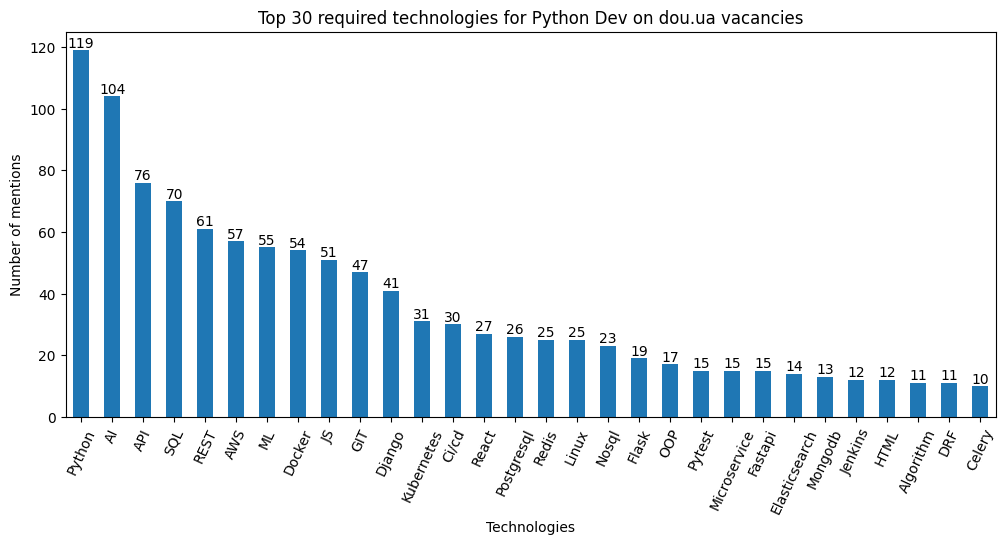

In [33]:
technologies = df["required_technologies"].str.split(",")
top_technologies = pd.Series(
    [
        tech.capitalize() if len(tech) > 4 else tech.upper()
        for sublist in technologies.dropna()
        for tech in sublist
    ]
).value_counts().head(30)



plt.figure(figsize=(12, 5))
plt.title("Top 30 required technologies for Python Dev on dou.ua vacancies")

plt.xlabel("Technologies")

plt.ylabel("Number of mentions")


bars = top_technologies.plot.bar(rot=65)
for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{bar.get_height()}",
        ha="center",
        va="bottom"
    )


plt.show()

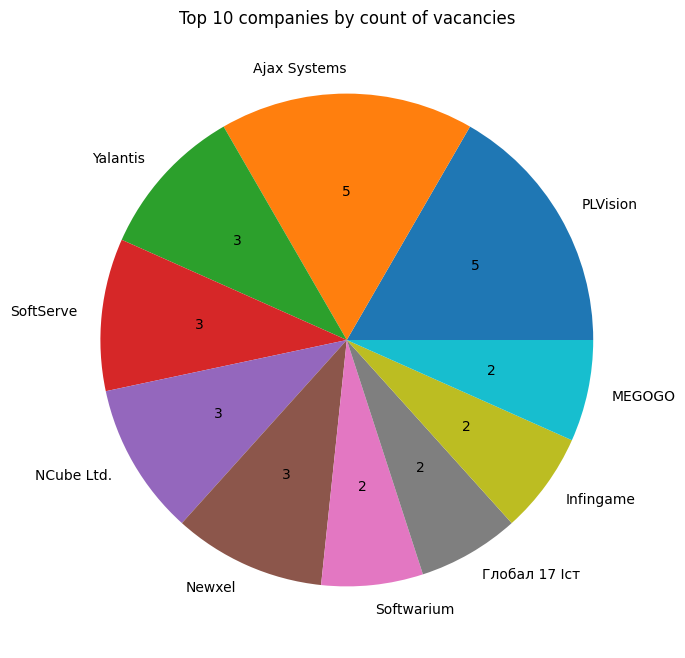

In [34]:
top_companies = df["company"].value_counts().head(10)
plt.figure(figsize=(8, 8))
plt.title("Top 10 companies by count of vacancies")

top_companies.plot.pie(autopct=lambda p: "{:.0f}".format(p * sum(top_companies) / 100))
plt.ylabel("")

plt.show()

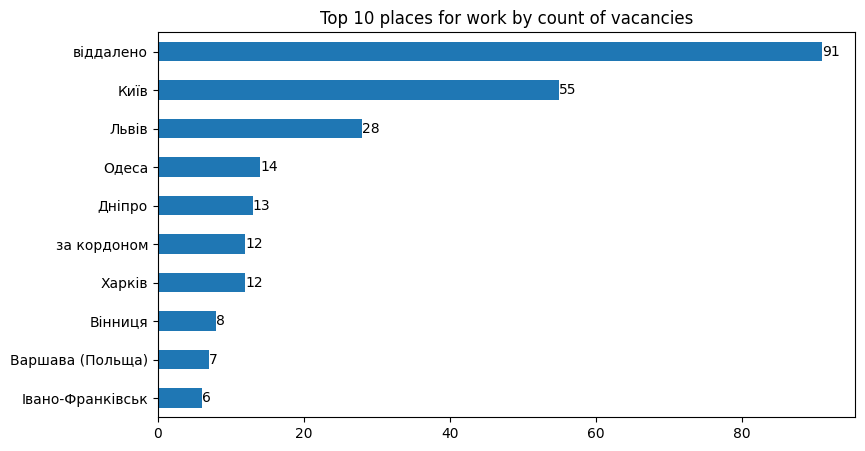

In [35]:
places = df["place"].str.split(",")
top_places = pd.Series(
    [
        place.strip()
        for sublist in places.dropna()
        for place in sublist
    ]
).value_counts().head(10)


plt.figure(figsize=(9, 5))
plt.title("Top 10 places for work by count of vacancies")


top_places = top_places.sort_values(ascending=True)

bars = top_places.plot.barh()
for bar in bars.patches:
    plt.text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        f"{bar.get_width()}",
        verticalalignment="center"
    )


plt.ylabel("")

plt.show()